### 03 Keras (케라스)

📌딥러닝 준비

1-1 주요 용어
- 하이퍼파라미터 (Hyperparameter)
    * 사용자가 직접 설정해는 설정 값
    * 학습 속도, 반복 횟수, ...
- 과소적합 vs 과대적합 (Underfitting vs Overfitting)
- 에포크 (Epoch)
    * 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프
- 손실 함수 (Loss function)
    * binary_crossentropy : 이진 분류
    * categorical_crossentropy : 다중 분류 (클래스가 원-핫 벡터인 경우)
    * sparse_categorical_crossentropy : 다중 분류 (클래스가 레이블 값인 경우)

In [1]:
import tensorflow as tf

In [2]:
# 클래스
tf.losses.BinaryCrossentropy()

# 함수
tf.losses.binary_crossentropy

<function keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0, axis=-1)>

- 경사하강법 (Gradient descent)
    * 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 최소 함수 값을 갖도록 하는 방법

1-2 딥러닝 프로세스
1. 데이터 전처리
2. 모델 생성
3. 모델 컴파일
4. 모델 훈련
5. 모델 검증
6. 모델 예측

📌단순 신경망 훈련
- 단순 선형 회귀 모델

In [3]:
import numpy as np

In [4]:
# 샘플 데이터 생성
x = np.arange(1, 6)

# y = 3 * x + 2
y = 3 * x + 2

print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


In [5]:
import matplotlib.pyplot as plt

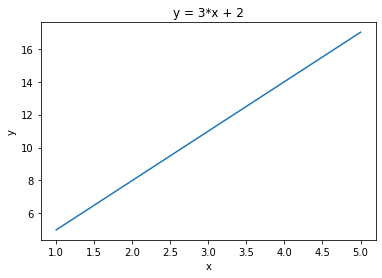

In [6]:
# 시각화
plt.plot(x, y)
plt.title('y = 3*x + 2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

🔹Sequential API 사용해 모델 구성

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
model = Sequential()

In [9]:
# 단순선형회귀모델 정의
# x값을 나타내는 입력 변수 1개 존재 --> input_shape = [1]
model.add(Dense(1, input_shape = [1]))

In [10]:
# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 컴파일
model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mae'])

In [12]:
# 훈련
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 403ms/step - loss: 56.9457 - mae: 7.1457
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 33.3350 - mae: 5.5108
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 19.5748 - mae: 4.2625
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.5551 - mae: 3.3093
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 6.8806 - mae: 2.5816


🔹위 모델은 과소적합 상태

In [13]:
model = Sequential()
model.add(Dense(1, input_shape = (1,)))

model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mae'])

history = model.fit(x, y, epochs = 1200)

Epoch 1/1200
1/1 [==============================] - 0s 282ms/step - loss: 76.8972 - mae: 8.2580
Epoch 2/1200
1/1 [==============================] - 0s 3ms/step - loss: 44.9422 - mae: 6.3561
Epoch 3/1200
1/1 [==============================] - 0s 4ms/step - loss: 26.3196 - mae: 4.9040
Epoch 4/1200
1/1 [==============================] - 0s 2ms/step - loss: 15.4664 - mae: 3.7954
Epoch 5/1200
1/1 [==============================] - 0s 3ms/step - loss: 9.1408 - mae: 2.9489
Epoch 6/1200
1/1 [==============================] - 0s 3ms/step - loss: 5.4537 - mae: 2.3025
Epoch 7/1200
1/1 [==============================] - 0s 3ms/step - loss: 3.3041 - mae: 1.8089
Epoch 8/1200
1/1 [==============================] - 0s 2ms/step - loss: 2.0507 - mae: 1.4319
Epoch 9/1200
1/1 [==============================] - 0s 2ms/step - loss: 1.3193 - mae: 1.1439
Epoch 10/1200
1/1 [==============================] - 0s 2ms/step - loss: 0.8923 - mae: 0.9239
Epoch 11/1200
1/1 [==============================] - 0s 2ms/ste

In [14]:
import pandas as pd

pd.DataFrame(history.history)

,loss,mae
0,76.897194,8.257991
1,44.942245,6.356074
2,26.319599,4.904010
3,15.466367,3.795356
4,9.140771,2.948856
...,...,...
1195,0.000097,0.008451
1196,0.000096,0.008423
1197,0.000096,0.008394
1198,0.000095,0.008366


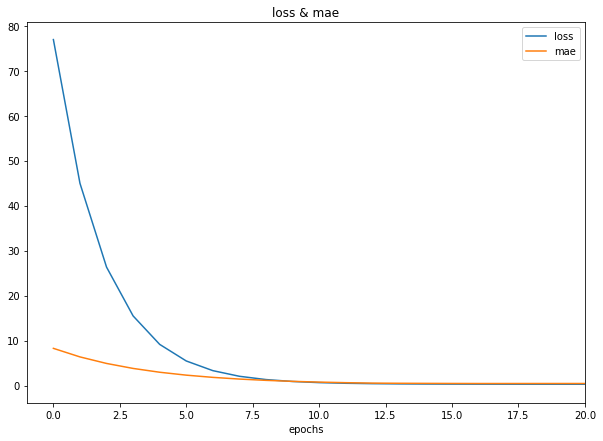

In [15]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.xlim(-1, 20)
plt.title('loss & mae')
plt.xlabel('epochs')
plt.show()

In [16]:
# 검증
model.evaluate(x, y)

# [loss, mae] 출력

1/1 [==============================] - 0s 161ms/step - loss: 9.3729e-05 - mae: 0.0083


[9.372852218803018e-05, 0.00830984115600586]

In [17]:
# 예측
model.predict([10])

array([[32.04016]], dtype=float32)

In [18]:
print(3 * 10 + 2)

32


🔹x = 10일 때 y = 32임을 감안한다면 정답에 꽤 근사한 값을 예측한 것을 볼 수 있음

📌 심층 신경망으로 이미지 분류

In [19]:
# 케라스 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [20]:
(X_tr, y_tr), (X_te, y_te) = mnist.load_data()

In [21]:
# 데이터셋 확인
print('train set: ', X_tr.shape, y_tr.shape)
print('test set: ', X_te.shape, y_te.shape)

train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)


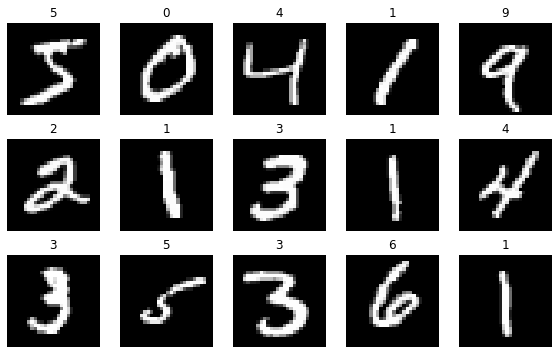

In [22]:
# 데이터 시각화
# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i//5, i%5]
    ax.imshow(X_tr[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_tr[i]))

plt.tight_layout()
plt.show()

In [23]:
# 데이터 전처리
print(f'정규화 전] 최소값: {X_tr.min()}, 정규화 전] 최댓값: {X_tr.max()}')

X_tr = X_tr / X_tr.max()

print(f'정규화 후] 최소값: {X_tr.min()}, 정규화 후] 최댓값: {X_tr.max()}')

정규화 전] 최소값: 0, 정규화 전] 최댓값: 255
정규화 후] 최소값: 0.0, 정규화 후] 최댓값: 1.0


In [24]:
X_te = X_te / 255

In [25]:
X_te

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [26]:
X_tr.shape

(60000, 28, 28)

In [27]:
print(f'변경 전 shape: {X_tr.shape}')
print(f'1D으로 shape 변경 후 : {X_tr.reshape(60000, -1).shape}')

변경 전 shape: (60000, 28, 28)
1D으로 shape 변경 후 : (60000, 784)


In [28]:
print(f'변경 전 shape: {X_tr.shape}')
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(X_tr).shape}')

변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


In [29]:
# relu 활성화 함수 적용
tf.keras.layers.Dense(128, activation='relu')

In [30]:
from tensorflow.keras.layers import Flatten

In [31]:
model = Sequential()
# input layer
model.add(Flatten(input_shape=(28, 28)))

# hidden layer
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

In [32]:
# 출력층 노드가 1인 경우
Dense(1, activation='sigmoid')

# 출력층 노드가 2개 이상인 경우
Dense(10, activation='softmax')

In [33]:
# 손실함수
# 이진 분류
model.compile(loss='binary_crossentropy')

In [34]:
# y가 원-핫 벡터인 경우
model.compile(loss='categorical_crossentropy')

# y가 원-핫 벡터가 아닌 경우
model.compile(loss='sparse_categorical_crossentropy')

In [35]:
# 옵티마이저
from tensorflow.keras.optimizers import Adam

In [36]:
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam)

In [37]:
# 평가 지표
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [38]:
# 훈련
model.fit(X_tr, y_tr,
          validation_data=(X_te, y_te),
          epochs=10,)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2281 - acc: 0.9317 - val_loss: 0.1108 - val_acc: 0.9658
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0937 - acc: 0.9715 - val_loss: 0.0958 - val_acc: 0.9706
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0652 - acc: 0.9792 - val_loss: 0.0672 - val_acc: 0.9788
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0481 - acc: 0.9849 - val_loss: 0.0826 - val_acc: 0.9763
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0385 - acc: 0.9875 - val_loss: 0.0928 - val_acc: 0.9758
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0317 - acc: 0.9894 - val_loss: 0.0870 - val_acc: 0.9756
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0281 - acc: 0.9909 - val_loss: 0.0920 - val_acc: 0.9767
Epoch 8/10
1875/1875 [==============================] - 4s 2ms

In [39]:
# 평가
test_loss, test_acc = model.evaluate(X_te, y_te)

print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0996 - acc: 0.9776
검증 셋 정확도: 0.9775999784469604


In [40]:
# 예측
predictions = model.predict(X_te)

In [41]:
predictions[0]

array([1.9197118e-10, 1.0708446e-07, 2.3485890e-07, 1.0091509e-05,
       2.5157687e-09, 6.0139871e-09, 1.4867061e-11, 9.9998891e-01,
       1.8726336e-09, 6.3113868e-07], dtype=float32)

In [42]:
# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

7


In [43]:
# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

[7 2 1 0 4 1 4 9 6 9]


In [44]:
# 데이터 시각화
def get_one_result(idx):
    img, y_true, y_pred, confidence = X_te[idx], y_te[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img, y_true, y_pred, confidence

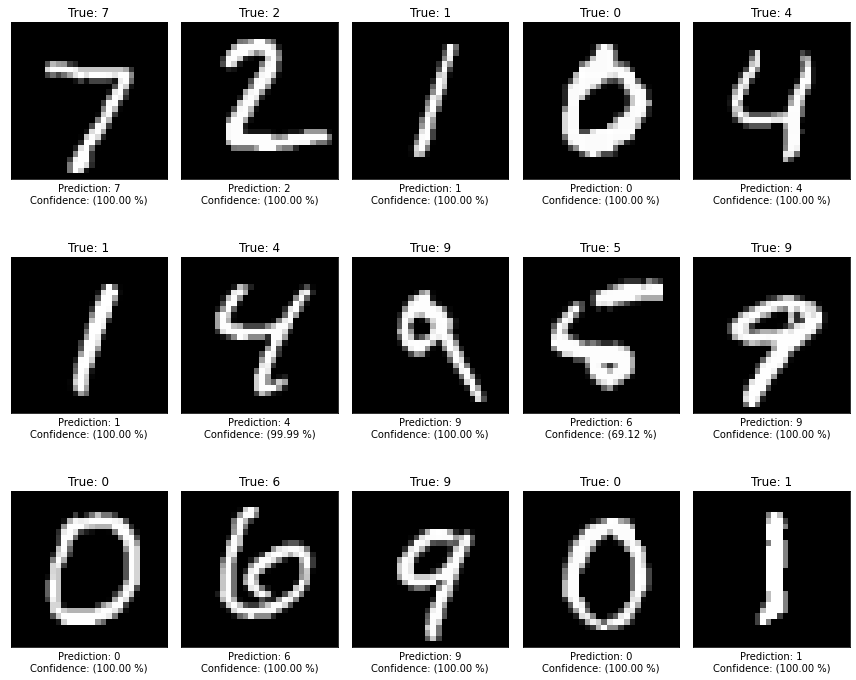

In [45]:
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
    ax = axes[i//5, i%5]
    img, y_true, y_pred, confidence = get_one_result(i)

    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()

##### wine data 예제

In [35]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

import pandas as pd
import matplotlib.pyplot as plt

In [9]:
raw_wine = datasets.load_wine()
raw_wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [10]:
X = raw_wine.data
y = raw_wine.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
model = Sequential()
model.add(Dense(13, input_shape=(X_train.shape[1], )))
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               1400      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 1,885
Trainable params: 1,885
Non-trainable params: 0
_________________________________________________________________


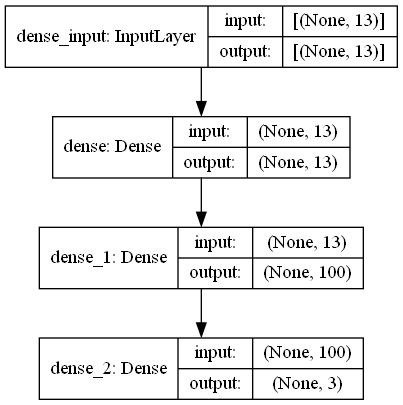

In [23]:
plot_model(model, show_shapes=True)

In [25]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [26]:
num_epo = 50
history = model.fit(X_train, y_train, epochs=num_epo, batch_size=5,
                    validation_data=(X_test, y_test))

Epoch 1/50
27/27 [==============================] - 1s 10ms/step - loss: 48.8644 - acc: 0.3684 - val_loss: 9.8261 - val_acc: 0.3333
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 6.8053 - acc: 0.3308 - val_loss: 5.5908 - val_acc: 0.1333
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 2.6700 - acc: 0.4662 - val_loss: 1.7701 - val_acc: 0.4889
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 2.4633 - acc: 0.4211 - val_loss: 1.7776 - val_acc: 0.6222
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 1.7802 - acc: 0.5489 - val_loss: 1.0522 - val_acc: 0.5778
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 1.7421 - acc: 0.5714 - val_loss: 2.9452 - val_acc: 0.5333
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 2.4314 - acc: 0.5639 - val_loss: 2.3745 - val_acc: 0.4444
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 3.8734 - acc: 0.

In [30]:
pd.DataFrame(history.history)

,loss,acc,val_loss,val_acc
0,48.864445,0.368421,9.826051,0.333333
1,6.805261,0.330827,5.590769,0.133333
2,2.670027,0.466165,1.770104,0.488889
3,2.463319,0.421053,1.777565,0.622222
4,1.780161,0.548872,1.052222,0.577778
5,1.742083,0.571429,2.945151,0.533333
6,2.431448,0.563910,2.374541,0.444444
7,3.873382,0.466165,2.120625,0.555556
8,1.628122,0.578947,1.664703,0.577778
9,0.945447,0.661654,1.534930,0.622222


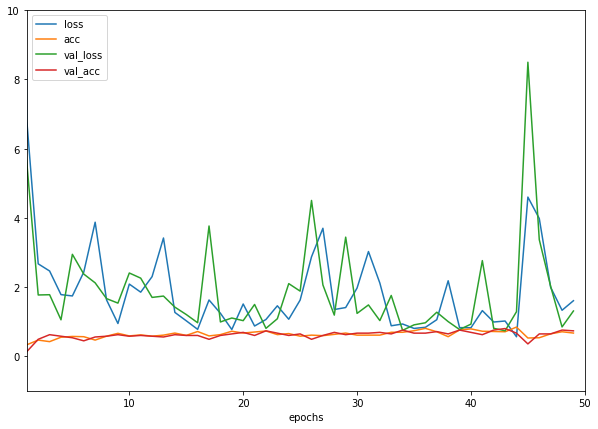

In [40]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.xlabel('epochs')
plt.xlim(1, 50)
plt.ylim(-1, 10)
plt.show()